In [1]:
#import os
#
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
#sep = os.sep

In [17]:
# Анализ оттока клиентов - Часть 1 - Исследование данных (EDA)

In [3]:
# Загрузить данные в DataFrame из csv-файла
df = pd.read_csv('Telco-Customer-Churn.csv')
df.sample(2)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
40,8865-TNMNX,Male,0,Yes,Yes,10,Yes,No,DSL,No,...,No,No,No,No,One year,No,Mailed check,49.55,475.70,No
6144,6685-XSHHU,Male,0,Yes,Yes,60,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Bank transfer (automatic),20.95,1270.55,No


In [4]:
 df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7032 entries, 0 to 7031
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   object 
 1   gender            7032 non-null   object 
 2   SeniorCitizen     7032 non-null   int64  
 3   Partner           7032 non-null   object 
 4   Dependents        7032 non-null   object 
 5   tenure            7032 non-null   int64  
 6   PhoneService      7032 non-null   object 
 7   MultipleLines     7032 non-null   object 
 8   InternetService   7032 non-null   object 
 9   OnlineSecurity    7032 non-null   object 
 10  OnlineBackup      7032 non-null   object 
 11  DeviceProtection  7032 non-null   object 
 12  TechSupport       7032 non-null   object 
 13  StreamingTV       7032 non-null   object 
 14  StreamingMovies   7032 non-null   object 
 15  Contract          7032 non-null   object 
 16  PaperlessBilling  7032 non-null   object 


In [5]:
# Считаем метрики для колонок с числами
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7032.000000,7032.000000,7032.000000,7032.000000
mean,0.162400,32.421786,64.798208,2283.300441
std,0.368844,24.545260,30.085974,2266.771362
min,0.000000,1.000000,18.250000,18.800000
25%,0.000000,9.000000,35.587500,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.862500,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


In [6]:
# Проверить есть ли ячейки со значением NaN
df.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [8]:
# Подсчет количества строк с одинаковыми значениями в колонке (с целевой переменной)
# (можно применять по категориальным признакам)
df['Churn'].value_counts()

Churn
No     5163
Yes    1869
Name: count, dtype: int64

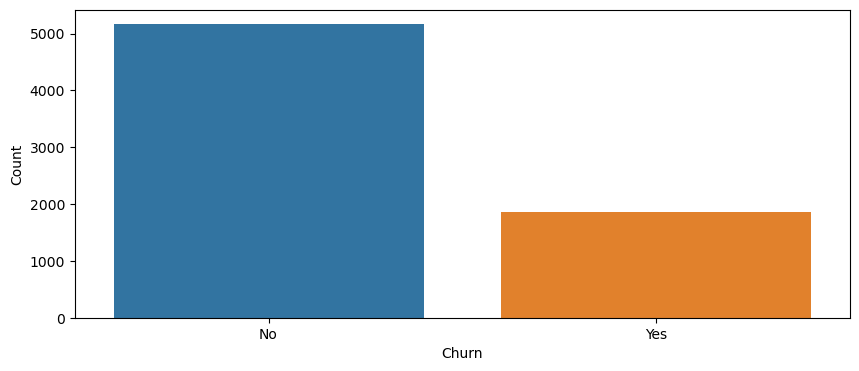

In [9]:
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(10, 4), dpi=100)
# Строим график: количество строк по категориям в колонке 'Churn'
sns.countplot(data=df, x='Churn')
plt.xlabel('Churn')
plt.ylabel('Count');

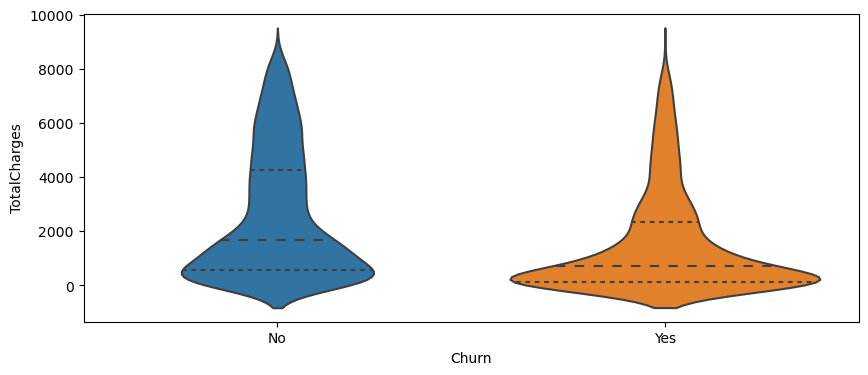

In [10]:
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(10, 4), dpi=100)
# Строим график Violinplot. (плотность распределения вероятности)
sns.violinplot(
    data=df,
    # из какой колонки брать значения
    x='Churn',
    # разбить по категориям из колонки y (если она указана)
    y='TotalCharges',
    # разбить на 4 интервала, в каждый из которых попадает 25% значений
    inner='quartile'
);

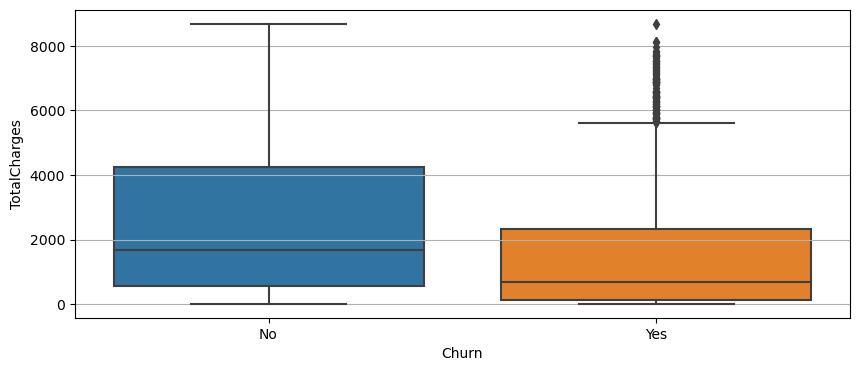

In [12]:
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(10, 4), dpi=100)
# Строим график Boxplot (для непрерывной величины). 
# Центральный прямоугольник - куда паподает 50% всех значений
# Середина этого прямоугольника - медиана
# Нижняя граница: 25-процентиль - 1.5 * высоту центрального прямоугольника
# Верхняя граница: 75-процентиль + 1.5 * высоту центрального прямоугольника
# Отдельные точки - выбросы
sns.boxplot(
    data=df,
    # из какой колонки брать значения
    y='TotalCharges', # вертикальная ориентация
    # разбить по категориям из колонки y (если она указана)
    x='Churn'
);
#axes.legend(loc=(1.02, 0.5));
axes.grid(axis='y');

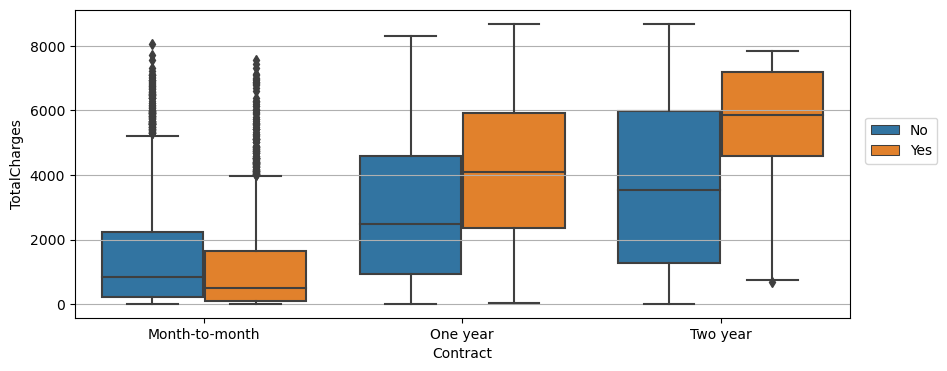

In [13]:
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(10, 4), dpi=100)
# Строим график Boxplot (для непрерывной величины). 
# Центральный прямоугольник - куда паподает 50% всех значений
# Середина этого прямоугольника - медиана
# Нижняя граница: 25-процентиль - 1.5 * высоту центрального прямоугольника
# Верхняя граница: 75-процентиль + 1.5 * высоту центрального прямоугольника
# Отдельные точки - выбросы
sns.boxplot(
    data=df,
    # из какой колонки брать значения
    y='TotalCharges', # вертикальная ориентация
    # разбить по категориям из колонки y (если она указана)
    x='Contract',
    # подкатегории
    hue='Churn',
);
axes.legend(loc=(1.02, 0.5));
axes.grid(axis='y');

In [14]:
# Получить только текстовые колонки из DataFrame'a
myObjectDf = df.select_dtypes(include='object')

myObjectDf = myObjectDf.drop(['customerID'], axis='columns')

# Добавить колонку 'SeniorCitizen'
seniorCitizen = df['SeniorCitizen']
myObjectDf = pd.concat([ pd.DataFrame(seniorCitizen), myObjectDf], axis='columns')

# Создать из категориальных переменных Dummy переменные (one hot encoding)
myDummiesDf = pd.get_dummies(myObjectDf)

for col in myDummiesDf.columns:
    tmp = myDummiesDf[col].apply(int)
    myDummiesDf[col] = tmp

#myDummiesDf

In [15]:
# Вычисляем корреляцию между dummy-переменными и колонкой 'Churn_Yes'
dummyCorr = myDummiesDf.corr()['Churn_Yes']
dummyCorr = dummyCorr.sort_values()
# Исключить строки 'Churn_Nos' и 'Churn_Yes'
dummyCorr = dummyCorr.iloc[1:-1]
#dummyCorr

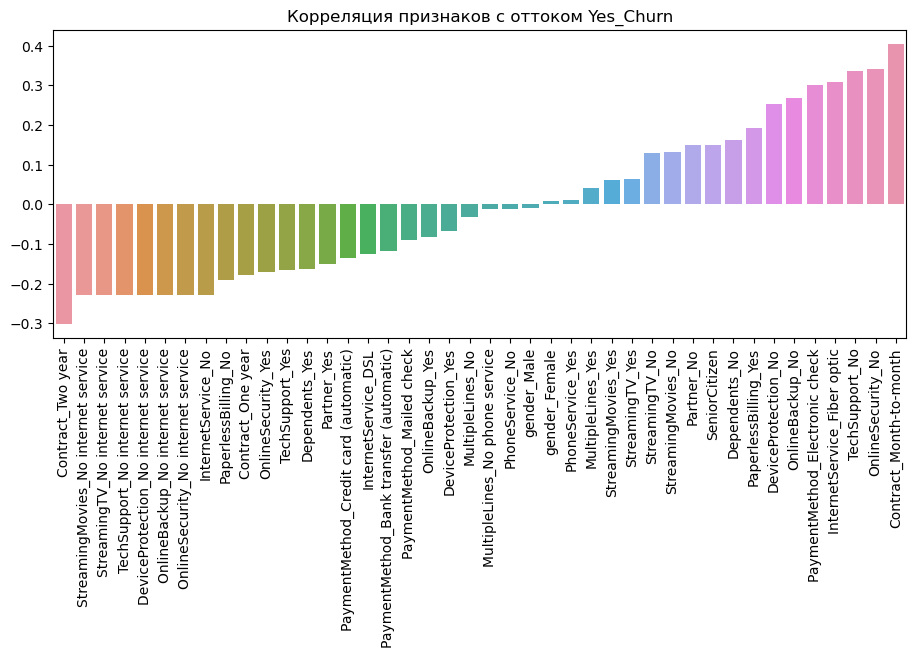

In [16]:
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(11, 4), dpi=100)
# Строим график: значения корреляции между dummy-переменными и колонкой 'Churn_Yes'
sns.barplot(x=dummyCorr.index, y=dummyCorr.values)
axes.set_title('Корреляция признаков с оттоком Yes_Churn')
plt.xticks(rotation=90);